In [3]:
import cv2img

In [4]:
cv2img.mains(imgin="certs\\1.jpeg", imgout="cert1")

DONE!


In [1]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

In [15]:
# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

ocr_url = endpoint + "/v2.1/ocr"

In [24]:
# Set image_url to the URL of an image that you want to analyze.
image_url = "https://raw.githubusercontent.com/gpnagar/Img-to-txt-v1/master/certs/1.jpeg?token=AKD7UA6FWXDTENBKOYHOTUS6TW2WY"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'unk', 'detectOrientation': 'true'}
data = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

In [25]:
# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '181,173,161,19', 'text': 'GOVERNMENT'},
 {'boundingBox': '350,173,156,19', 'text': 'POLYTECHNIC'},
 {'boundingBox': '513,173,153,18', 'text': 'AHMEDNAGAR'},
 {'boundingBox': '330,201,58,11', 'text': 'aurudgaon'},
 {'boundingBox': '392,200,30,11', 'text': 'Road,'},
 {'boundingBox': '425,200,68,11', 'text': 'Ahmednagar'},
 {'boundingBox': '496,200,31,12', 'text': '(M.S.)'},
 {'boundingBox': '351,228,159,30', 'text': 'C.rfaifå%tatg'},
 {'boundingBox': '172,294,21,9', 'text': 'This'},
 {'boundingBox': '197,293,48,9', 'text': 'certificate'},
 {'boundingBox': '249,293,8,9', 'text': 'is'},
 {'boundingBox': '260,292,43,10', 'text': 'awarded'},
 {'boundingBox': '307,293,9,8', 'text': 'to'},
 {'boundingBox': '320,291,47,10', 'text': 'Mr./Miss./'},
 {'boundingBox': '370,287,53,15', 'text': 'Mrs—A'},
 {'boundingBox': '495,289,26,8', 'text': 'cum'},
 {'boundingBox': '523,288,15,8', 'text': 'on'},
 {'boundingBox': '173,320,10,8', 'text': 'of'},
 {'boundingBox': '185,312,72,17', 'te

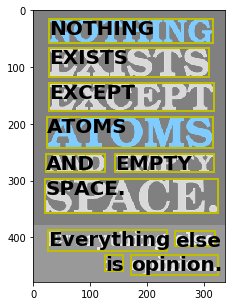

(0.0, 1.0, 0.0, 1.0)

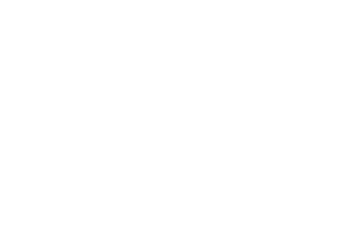

In [19]:
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.show()
plt.axis("off")